In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_parquet(r"C:\Users\Akash Goel\Downloads\yellow_tripdata_2023-06.parquet")

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.90,3.50,0.5,6.70,0.00,1.0,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.60,3.50,0.5,3.00,0.00,1.0,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.80,7.75,0.5,10.00,0.00,1.0,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.40,1.00,0.5,8.88,0.00,1.0,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.30,1.00,0.5,0.72,0.00,1.0,15.02,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,2,2023-06-30 23:30:21,2023-07-01 00:00:46,NaN,9.20,NaN,None,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,NaN,NaN
3307230,1,2023-06-30 23:34:22,2023-07-01 00:32:59,NaN,20.20,NaN,None,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,NaN,NaN
3307231,2,2023-06-30 23:45:00,2023-07-01 00:10:00,NaN,6.16,NaN,None,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,NaN,NaN
3307232,2,2023-06-30 23:13:38,2023-06-30 23:51:19,NaN,11.65,NaN,None,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,NaN,NaN


In [4]:
df1 = df.sample(1000000)

In [5]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2915959,1,2023-06-28 05:46:14,2023-06-28 06:27:48,1.0,0.00,99.0,N,214,197,1,60.5,0.00,0.5,0.00,0.00,1.0,62.00,0.0,0.00
2797235,1,2023-06-26 21:54:56,2023-06-26 21:58:19,1.0,0.60,1.0,N,141,263,2,5.1,3.50,0.5,0.00,0.00,1.0,10.10,2.5,0.00
2566317,1,2023-06-24 15:50:11,2023-06-24 16:39:44,2.0,17.70,2.0,N,132,229,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75
1052457,2,2023-06-10 12:39:16,2023-06-10 13:37:00,2.0,17.90,2.0,N,132,100,1,70.0,0.00,0.5,16.11,6.55,1.0,98.41,2.5,1.75
2104535,1,2023-06-20 14:54:29,2023-06-20 15:44:10,3.0,11.10,1.0,Y,132,188,2,56.2,1.75,0.5,0.00,0.00,1.0,59.45,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030522,1,2023-06-29 09:47:40,2023-06-29 10:10:52,0.0,1.40,1.0,N,164,163,1,19.8,2.50,0.5,4.76,0.00,1.0,28.56,2.5,0.00
1736892,2,2023-06-16 15:31:08,2023-06-16 15:37:21,4.0,1.32,1.0,N,107,229,1,8.6,0.00,0.5,1.50,0.00,1.0,14.10,2.5,0.00
1247478,1,2023-06-12 12:08:02,2023-06-12 13:20:16,4.0,17.90,2.0,N,132,48,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75
2492825,2,2023-06-23 21:10:42,2023-06-23 21:20:51,1.0,2.88,1.0,N,107,141,1,14.2,1.00,0.5,1.54,0.00,1.0,20.74,2.5,0.00


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 2915959 to 671575
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1000000 non-null  int32         
 1   tpep_pickup_datetime   1000000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1000000 non-null  datetime64[ns]
 3   passenger_count        969919 non-null   float64       
 4   trip_distance          1000000 non-null  float64       
 5   RatecodeID             969919 non-null   float64       
 6   store_and_fwd_flag     969919 non-null   object        
 7   PULocationID           1000000 non-null  int32         
 8   DOLocationID           1000000 non-null  int32         
 9   payment_type           1000000 non-null  int64         
 10  fare_amount            1000000 non-null  float64       
 11  extra                  1000000 non-null  float64       
 12  mta_tax                

In [7]:
time = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])

In [8]:
# a = []
# for i in time:
#      a.append(i.seconds)
# b = pd.DataFrame(a)
# b

In [9]:
# b[0]

In [10]:
# df1['time']=b[0]

In [11]:
# pd.concat([df1,b])

In [12]:
# df1.drop(columns = ['time'],inplace=True)

In [13]:
df3=df1.copy()

In [14]:
#time1 = pd.DataFrame(time)

In [15]:
#df1['time'] = time1

In [16]:
df3

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2915959,1,2023-06-28 05:46:14,2023-06-28 06:27:48,1.0,0.00,99.0,N,214,197,1,60.5,0.00,0.5,0.00,0.00,1.0,62.00,0.0,0.00
2797235,1,2023-06-26 21:54:56,2023-06-26 21:58:19,1.0,0.60,1.0,N,141,263,2,5.1,3.50,0.5,0.00,0.00,1.0,10.10,2.5,0.00
2566317,1,2023-06-24 15:50:11,2023-06-24 16:39:44,2.0,17.70,2.0,N,132,229,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75
1052457,2,2023-06-10 12:39:16,2023-06-10 13:37:00,2.0,17.90,2.0,N,132,100,1,70.0,0.00,0.5,16.11,6.55,1.0,98.41,2.5,1.75
2104535,1,2023-06-20 14:54:29,2023-06-20 15:44:10,3.0,11.10,1.0,Y,132,188,2,56.2,1.75,0.5,0.00,0.00,1.0,59.45,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030522,1,2023-06-29 09:47:40,2023-06-29 10:10:52,0.0,1.40,1.0,N,164,163,1,19.8,2.50,0.5,4.76,0.00,1.0,28.56,2.5,0.00
1736892,2,2023-06-16 15:31:08,2023-06-16 15:37:21,4.0,1.32,1.0,N,107,229,1,8.6,0.00,0.5,1.50,0.00,1.0,14.10,2.5,0.00
1247478,1,2023-06-12 12:08:02,2023-06-12 13:20:16,4.0,17.90,2.0,N,132,48,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75
2492825,2,2023-06-23 21:10:42,2023-06-23 21:20:51,1.0,2.88,1.0,N,107,141,1,14.2,1.00,0.5,1.54,0.00,1.0,20.74,2.5,0.00


In [17]:
#df1 = df1['time'].astype('timedelta64[s]')

In [18]:
time

2915959   0 days 00:41:34
2797235   0 days 00:03:23
2566317   0 days 00:49:33
1052457   0 days 00:57:44
2104535   0 days 00:49:41
                ...      
3030522   0 days 00:23:12
1736892   0 days 00:06:13
1247478   0 days 01:12:14
2492825   0 days 00:10:09
671575    0 days 00:07:07
Length: 1000000, dtype: timedelta64[ns]

In [19]:
time1 = pd.DataFrame(time)

In [20]:
time1

,0
2915959,0 days 00:41:34
2797235,0 days 00:03:23
2566317,0 days 00:49:33
1052457,0 days 00:57:44
2104535,0 days 00:49:41
...,...
3030522,0 days 00:23:12
1736892,0 days 00:06:13
1247478,0 days 01:12:14
2492825,0 days 00:10:09


In [21]:
time1[1] = time1[0].astype('timedelta64[s]')

In [22]:
time1

,0,1
2915959,0 days 00:41:34,2494.0
2797235,0 days 00:03:23,203.0
2566317,0 days 00:49:33,2973.0
1052457,0 days 00:57:44,3464.0
2104535,0 days 00:49:41,2981.0
...,...,...
3030522,0 days 00:23:12,1392.0
1736892,0 days 00:06:13,373.0
1247478,0 days 01:12:14,4334.0
2492825,0 days 00:10:09,609.0


In [23]:
df1['time'] = time1[1]

In [24]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time
2915959,1,2023-06-28 05:46:14,2023-06-28 06:27:48,1.0,0.00,99.0,N,214,197,1,60.5,0.00,0.5,0.00,0.00,1.0,62.00,0.0,0.00,2494.0
2797235,1,2023-06-26 21:54:56,2023-06-26 21:58:19,1.0,0.60,1.0,N,141,263,2,5.1,3.50,0.5,0.00,0.00,1.0,10.10,2.5,0.00,203.0
2566317,1,2023-06-24 15:50:11,2023-06-24 16:39:44,2.0,17.70,2.0,N,132,229,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75,2973.0
1052457,2,2023-06-10 12:39:16,2023-06-10 13:37:00,2.0,17.90,2.0,N,132,100,1,70.0,0.00,0.5,16.11,6.55,1.0,98.41,2.5,1.75,3464.0
2104535,1,2023-06-20 14:54:29,2023-06-20 15:44:10,3.0,11.10,1.0,Y,132,188,2,56.2,1.75,0.5,0.00,0.00,1.0,59.45,0.0,1.75,2981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030522,1,2023-06-29 09:47:40,2023-06-29 10:10:52,0.0,1.40,1.0,N,164,163,1,19.8,2.50,0.5,4.76,0.00,1.0,28.56,2.5,0.00,1392.0
1736892,2,2023-06-16 15:31:08,2023-06-16 15:37:21,4.0,1.32,1.0,N,107,229,1,8.6,0.00,0.5,1.50,0.00,1.0,14.10,2.5,0.00,373.0
1247478,1,2023-06-12 12:08:02,2023-06-12 13:20:16,4.0,17.90,2.0,N,132,48,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75,4334.0
2492825,2,2023-06-23 21:10:42,2023-06-23 21:20:51,1.0,2.88,1.0,N,107,141,1,14.2,1.00,0.5,1.54,0.00,1.0,20.74,2.5,0.00,609.0


In [25]:
df1.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)

In [26]:
df1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time
2915959,1,1.0,0.00,99.0,N,214,197,1,60.5,0.00,0.5,0.00,0.00,1.0,62.00,0.0,0.00,2494.0
2797235,1,1.0,0.60,1.0,N,141,263,2,5.1,3.50,0.5,0.00,0.00,1.0,10.10,2.5,0.00,203.0
2566317,1,2.0,17.70,2.0,N,132,229,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75,2973.0
1052457,2,2.0,17.90,2.0,N,132,100,1,70.0,0.00,0.5,16.11,6.55,1.0,98.41,2.5,1.75,3464.0
2104535,1,3.0,11.10,1.0,Y,132,188,2,56.2,1.75,0.5,0.00,0.00,1.0,59.45,0.0,1.75,2981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030522,1,0.0,1.40,1.0,N,164,163,1,19.8,2.50,0.5,4.76,0.00,1.0,28.56,2.5,0.00,1392.0
1736892,2,4.0,1.32,1.0,N,107,229,1,8.6,0.00,0.5,1.50,0.00,1.0,14.10,2.5,0.00,373.0
1247478,1,4.0,17.90,2.0,N,132,48,1,70.0,4.25,0.5,16.45,6.55,1.0,98.75,2.5,1.75,4334.0
2492825,2,1.0,2.88,1.0,N,107,141,1,14.2,1.00,0.5,1.54,0.00,1.0,20.74,2.5,0.00,609.0


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 2915959 to 671575
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1000000 non-null  int32  
 1   passenger_count        969919 non-null   float64
 2   trip_distance          1000000 non-null  float64
 3   RatecodeID             969919 non-null   float64
 4   store_and_fwd_flag     969919 non-null   object 
 5   PULocationID           1000000 non-null  int32  
 6   DOLocationID           1000000 non-null  int32  
 7   payment_type           1000000 non-null  int64  
 8   fare_amount            1000000 non-null  float64
 9   extra                  1000000 non-null  float64
 10  mta_tax                1000000 non-null  float64
 11  tip_amount             1000000 non-null  float64
 12  tolls_amount           1000000 non-null  float64
 13  improvement_surcharge  1000000 non-null  float64
 14  total_amount 

In [28]:
df1['VendorID'].value_counts()

2    735831
1    263843
6       326
Name: VendorID, dtype: int64

In [29]:
df1['VendorID'] = np.where(df1['VendorID']==6,2,df1['VendorID'])

In [30]:
df1['VendorID'].value_counts()  #dummy

2    736157
1    263843
Name: VendorID, dtype: int64

In [31]:
df1['passenger_count'].value_counts()

1.0    729166
2.0    146052
3.0     37037
4.0     20138
0.0     16366
5.0     12428
6.0      8719
8.0        12
7.0         1
Name: passenger_count, dtype: int64

In [32]:
df1['passenger_count'].isnull().sum()

30081

<Axes: >

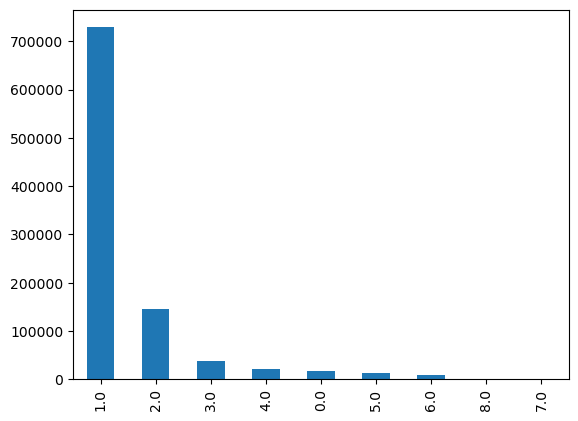

In [33]:
df1['passenger_count'].value_counts().plot(kind='bar')

In [34]:
df1.dropna(inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969919 entries, 2915959 to 671575
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               969919 non-null  int32  
 1   passenger_count        969919 non-null  float64
 2   trip_distance          969919 non-null  float64
 3   RatecodeID             969919 non-null  float64
 4   store_and_fwd_flag     969919 non-null  object 
 5   PULocationID           969919 non-null  int32  
 6   DOLocationID           969919 non-null  int32  
 7   payment_type           969919 non-null  int64  
 8   fare_amount            969919 non-null  float64
 9   extra                  969919 non-null  float64
 10  mta_tax                969919 non-null  float64
 11  tip_amount             969919 non-null  float64
 12  tolls_amount           969919 non-null  float64
 13  improvement_surcharge  969919 non-null  float64
 14  total_amount           969919 

In [36]:
df1['trip_distance'].value_counts()

1.00     13412
0.90     13160
1.10     13147
0.80     12861
0.00     12749
         ...  
34.45        1
41.00        1
29.97        1
44.70        1
35.89        1
Name: trip_distance, Length: 3819, dtype: int64

<Axes: ylabel='trip_distance'>

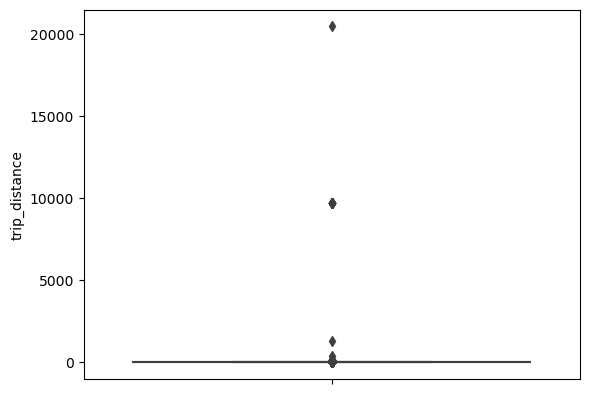

In [37]:
sns.boxplot(df1,y=df1['trip_distance'])

In [38]:
df1['trip_distance'].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.25,0.5,0.75,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])

count    969919.000000
mean          3.704603
std          42.495982
min           0.000000
1%            0.000000
2%            0.200000
3%            0.360000
4%            0.420000
5%            0.500000
25%           1.060000
50%           1.800000
75%           3.460000
91%          10.110000
92%          10.860000
93%          11.800000
94%          13.510000
95%          16.160000
96%          17.300000
97%          18.000000
98%          18.840000
99%          20.490000
max       20454.760000
Name: trip_distance, dtype: float64

In [39]:
df1['trip_distance'].max()

20454.76

In [40]:
def percentile(x):
    df1[x] = df1[x].clip(upper = df1[x].quantile(0.99))
    df1[x] = df1[x].clip(lower = df1[x].quantile(0.01))
    return df1[x]
#     q1 = df1[x].quantile(0.25)
#     q3 = df1[x].quantile(0.75)
    
#     iqr = q3 - q1
    
#     low = q1-1.5*iqr
#     upp = q3+1.5*iqr
    
#     df1[x]=np.where(df1[x]<low,low,df1[x])
#     df1[x]=np.where(df1[x]>upp,upp,df1[x])

In [41]:
percentile('trip_distance')

2915959     0.00
2797235     0.60
2566317    17.70
1052457    17.90
2104535    11.10
           ...  
3030522     1.40
1736892     1.32
1247478    17.90
2492825     2.88
671575      0.82
Name: trip_distance, Length: 969919, dtype: float64

<Axes: ylabel='trip_distance'>

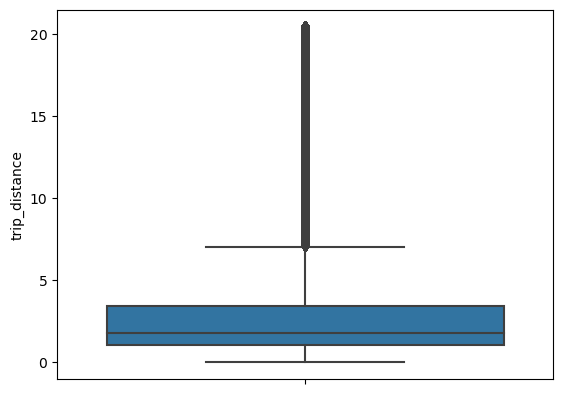

In [42]:
sns.boxplot(df1,y=df1['trip_distance'])

In [44]:
df1['RatecodeID'].value_counts()

1.0     913295
2.0      40548
5.0       5705
99.0      4655
3.0       3522
4.0       2192
6.0          2
Name: RatecodeID, dtype: int64

In [45]:
df1['RatecodeID'] = np.where(df1['RatecodeID']==99,1,df1['RatecodeID'])

<Axes: >

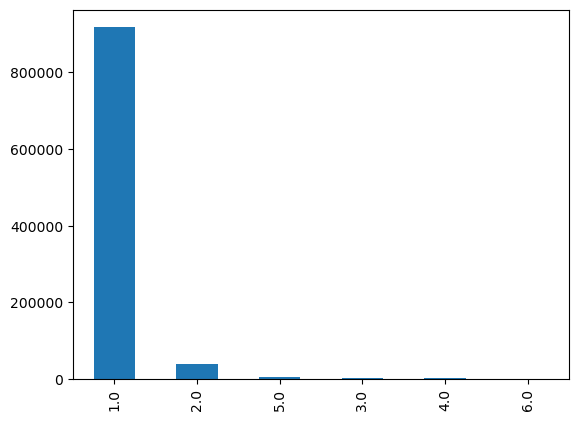

In [46]:
df1['RatecodeID'].value_counts().plot(kind='bar')  #dummy

In [47]:
df1['store_and_fwd_flag'].value_counts() #dummy

N    965461
Y      4458
Name: store_and_fwd_flag, dtype: int64

In [48]:
df1['PULocationID'].value_counts() #drop

132    54413
237    46300
161    45181
236    40258
138    36158
       ...  
199        1
58         1
172        1
99         1
221        1
Name: PULocationID, Length: 251, dtype: int64

In [49]:
df1['DOLocationID'].value_counts() #drop

236    42011
237    40870
161    37750
230    29875
170    29103
       ...  
204        5
176        5
187        2
99         1
2          1
Name: DOLocationID, Length: 260, dtype: int64

In [50]:
df1['payment_type'].value_counts()  #dummy

1    783788
2    167245
4     12333
3      6553
Name: payment_type, dtype: int64

In [51]:
df1['fare_amount'].value_counts()

8.60      43558
9.30      42680
10.00     42518
7.90      41642
10.70     40713
          ...  
187.00        1
30.70         1
55.60         1
295.00        1
12.02         1
Name: fare_amount, Length: 1802, dtype: int64

In [52]:
percentile('fare_amount')

2915959    60.5
2797235     5.1
2566317    70.0
1052457    70.0
2104535    56.2
           ... 
3030522    19.8
1736892     8.6
1247478    70.0
2492825    14.2
671575      8.6
Name: fare_amount, Length: 969919, dtype: float64

<Axes: ylabel='fare_amount'>

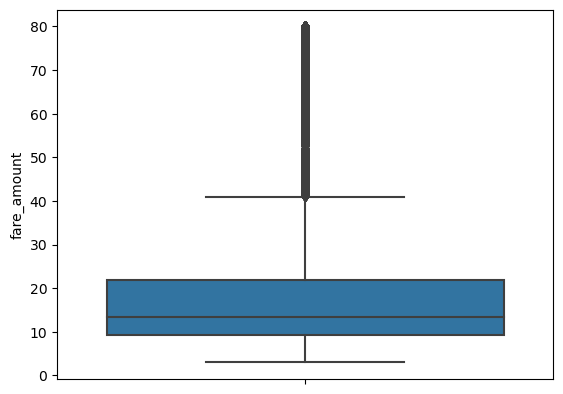

In [53]:
sns.boxplot(data=df1,y=df1['fare_amount'])

In [54]:
df1['extra'].value_counts()

 0.00     355592
 2.50     245810
 1.00     193677
 5.00      72522
 3.50      59292
 6.00       9220
 7.50       9107
 4.25       5119
 9.25       4463
-1.00       2800
 1.75       2555
 2.75       1949
 6.75       1688
-2.50       1568
 10.25      1303
 7.75       1092
 11.75       992
-5.00        324
 10.00       304
 8.50        261
-6.00        133
-7.50         77
 5.25         25
 3.20          6
 1.50          5
 2.45          5
 0.75          4
 3.25          4
 0.70          2
 0.50          2
 0.05          2
 14.25         2
-4.25          1
 11.00         1
 0.25          1
 2.70          1
-0.75          1
 2.25          1
 12.75         1
 0.11          1
 7.45          1
-0.25          1
 8.20          1
 3.80          1
 9.50          1
 0.04          1
Name: extra, dtype: int64

In [55]:
percentile('extra').value_counts()

0.00    360497
2.50    245810
1.00    193677
5.00     72522
3.50     59292
7.50     17528
6.00      9220
4.25      5119
1.75      2555
2.75      1949
6.75      1688
5.25        25
3.20         6
2.45         5
1.50         5
0.75         4
3.25         4
0.70         2
0.50         2
0.05         2
7.45         1
3.80         1
0.11         1
2.25         1
2.70         1
0.25         1
0.04         1
Name: extra, dtype: int64

<Axes: ylabel='extra'>

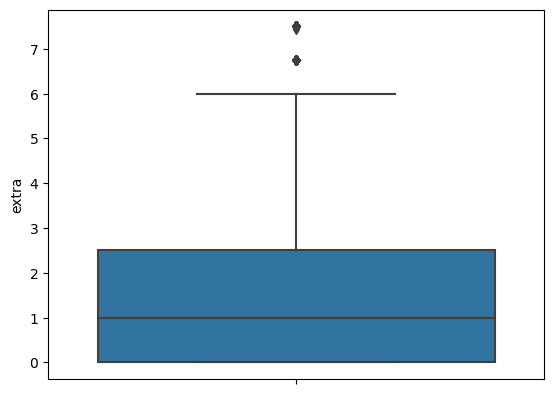

In [56]:
sns.boxplot(data=df1,y=df1['extra'])

In [57]:
df1['mta_tax'].value_counts() 

 0.50    951326
 0.00      9532
-0.50      9045
 0.05        13
 0.80         1
-0.05         1
 4.00         1
Name: mta_tax, dtype: int64

In [58]:
df1['mta_tax']=0.50

In [59]:
df1['tip_amount'].value_counts()

0.00     223097
2.00      48990
1.00      38928
3.00      26837
5.00      15517
          ...  
32.55         1
53.35         1
37.86         1
43.45         1
30.96         1
Name: tip_amount, Length: 3492, dtype: int64

<Axes: ylabel='tip_amount'>

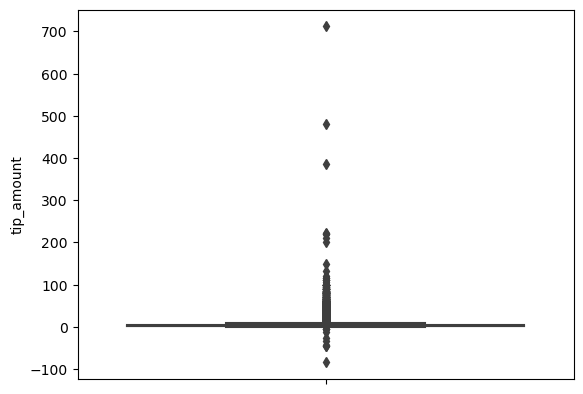

In [60]:
sns.boxplot(data=df1,y=df1['tip_amount'])

In [61]:
percentile('tip_amount')

2915959     0.00
2797235     0.00
2566317    16.45
1052457    16.11
2104535     0.00
           ...  
3030522     4.76
1736892     1.50
1247478    16.45
2492825     1.54
671575      2.02
Name: tip_amount, Length: 969919, dtype: float64

<Axes: ylabel='tip_amount'>

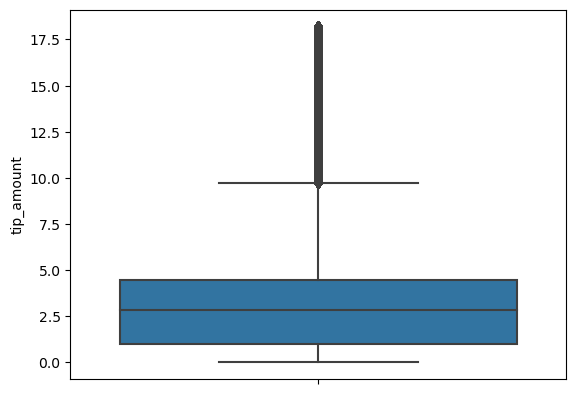

In [62]:
sns.boxplot(df1,y=df1['tip_amount'])

In [63]:
df1['tolls_amount'].value_counts()

0.00     888055
6.55      74565
12.75       957
14.75       790
3.00        548
          ...  
18.64         1
0.30          1
16.85         1
25.54         1
11.05         1
Name: tolls_amount, Length: 489, dtype: int64

In [64]:
percentile('tolls_amount')

2915959    0.00
2797235    0.00
2566317    6.55
1052457    6.55
2104535    0.00
           ... 
3030522    0.00
1736892    0.00
1247478    6.55
2492825    0.00
671575     0.00
Name: tolls_amount, Length: 969919, dtype: float64

<Axes: ylabel='tolls_amount'>

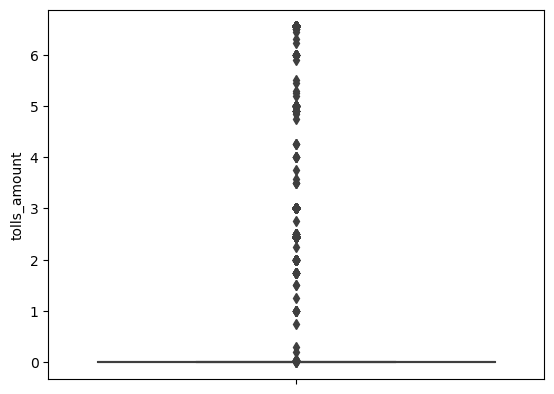

In [65]:
sns.boxplot(df1,y=
            df1['tolls_amount'])

In [67]:
df1['tolls_amount'] = np.where(df1['tolls_amount']!=0,6.55,df1['tolls_amount'])

In [68]:
df1['tolls_amount'].value_counts()

0.00    888667
6.55     81252
Name: tolls_amount, dtype: int64

In [69]:
df1['improvement_surcharge'].value_counts()

 1.0    960130
-1.0      9327
 0.0       234
 0.3       228
Name: improvement_surcharge, dtype: int64

In [70]:
df1['improvement_surcharge']=1

In [71]:
df1['total_amount'].value_counts()

 16.80     13554
 12.60     12212
 21.00     11428
 18.00      7707
 15.12      7152
           ...  
 120.78        1
-60.00         1
 338.20        1
 183.00        1
 187.51        1
Name: total_amount, Length: 11836, dtype: int64

<Axes: ylabel='total_amount'>

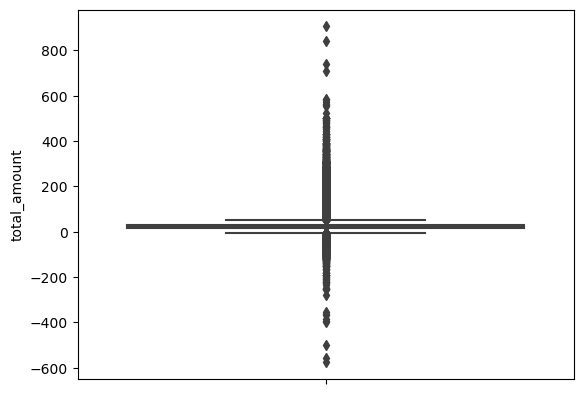

In [72]:
sns.boxplot(df1,y=df1['total_amount'])

In [73]:
percentile('total_amount')

2915959    62.00
2797235    10.10
2566317    98.75
1052457    98.41
2104535    59.45
           ...  
3030522    28.56
1736892    14.10
1247478    98.75
2492825    20.74
671575     12.12
Name: total_amount, Length: 969919, dtype: float64

In [74]:
df1['total_amount'].value_counts()

16.80     13554
12.60     12212
21.00     11428
4.50      10691
104.41    10523
          ...  
31.42         1
20.14         1
18.67         1
84.57         1
33.21         1
Name: total_amount, Length: 7173, dtype: int64

<Axes: ylabel='total_amount'>

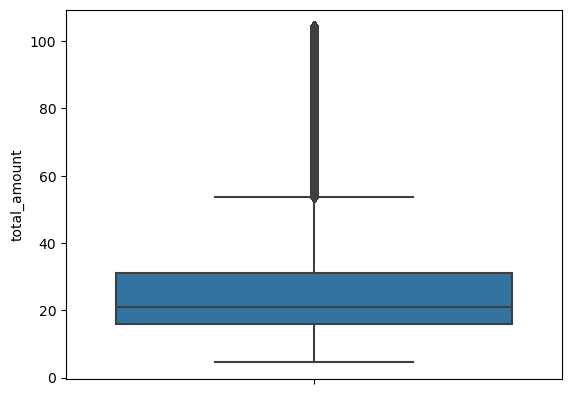

In [75]:
sns.boxplot(df1,y=df1['total_amount'])

In [76]:
df1['congestion_surcharge'].value_counts() 

 2.5    885268
 0.0     77147
-2.5      7503
 1.0         1
Name: congestion_surcharge, dtype: int64

In [77]:
df1['congestion_surcharge'] = np.where(df1['congestion_surcharge']==-2.50,2.50,df1['congestion_surcharge'])

In [78]:
df1['congestion_surcharge'] = np.where(df1['congestion_surcharge']==1,2.50,df1['congestion_surcharge'])

In [79]:
df1['congestion_surcharge'].value_counts()

2.5    892772
0.0     77147
Name: congestion_surcharge, dtype: int64

In [80]:
df1['Airport_fee'].value_counts() 

 0.00    882288
 1.75     86439
-1.75      1192
Name: Airport_fee, dtype: int64

In [81]:
df1['Airport_fee']=np.where(df1['Airport_fee']==-1.75,1.75,df1['Airport_fee'])

In [82]:
df1['Airport_fee'].value_counts()

0.00    882288
1.75     87631
Name: Airport_fee, dtype: int64

In [83]:
df1['time'].value_counts()

410.0     965
460.0     958
476.0     952
546.0     945
496.0     936
         ... 
6192.0      1
7139.0      1
6313.0      1
6092.0      1
5892.0      1
Name: time, Length: 7244, dtype: int64

<Axes: ylabel='time'>

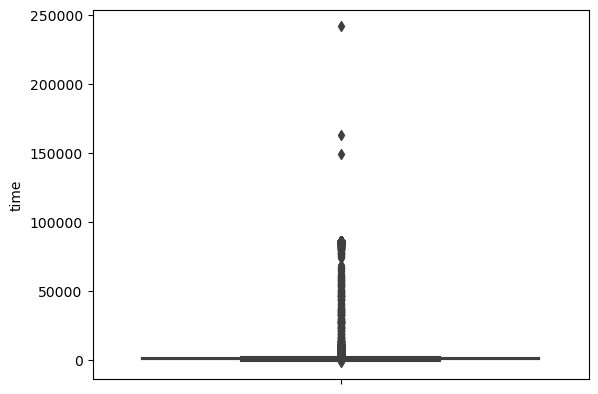

In [84]:
sns.boxplot(df1,y=df1['time'])

In [85]:
percentile('time')

2915959    2494.0
2797235     203.0
2566317    2973.0
1052457    3464.0
2104535    2981.0
            ...  
3030522    1392.0
1736892     373.0
1247478    4147.0
2492825     609.0
671575      427.0
Name: time, Length: 969919, dtype: float64

<Axes: ylabel='time'>

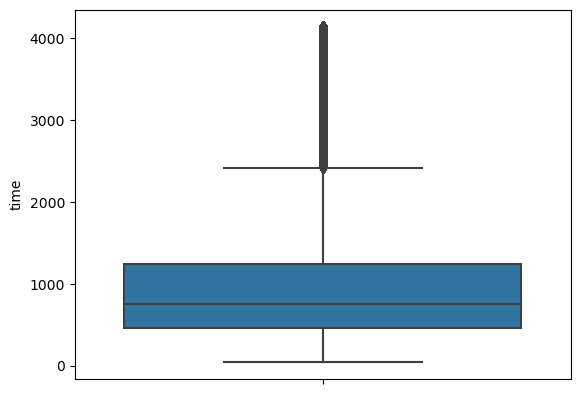

In [86]:
sns.boxplot(df1,y=df1['time'])

<Axes: xlabel='total_amount', ylabel='Count'>

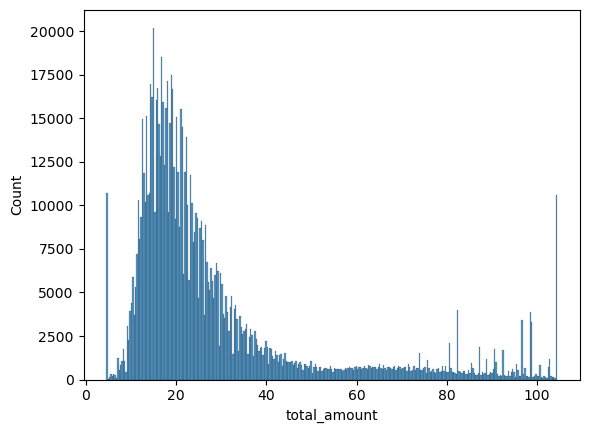

In [87]:
sns.histplot(df1,x='total_amount')

In [88]:
df1['total_amount1'] = df1['total_amount']**(1/4)

<Axes: xlabel='total_amount1', ylabel='Count'>

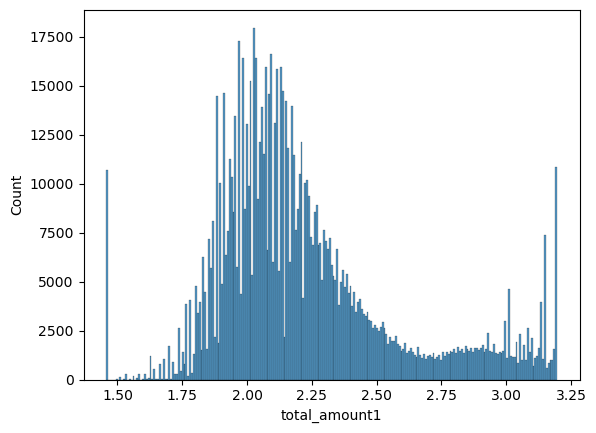

In [89]:
sns.histplot(df1,x='total_amount1')

In [90]:
df1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time,total_amount1
2915959,1,1.0,0.00,1.0,N,214,197,1,60.5,0.00,0.5,0.00,0.00,1,62.00,0.0,0.00,2494.0,2.806066
2797235,1,1.0,0.60,1.0,N,141,263,2,5.1,3.50,0.5,0.00,0.00,1,10.10,2.5,0.00,203.0,1.782709
2566317,1,2.0,17.70,2.0,N,132,229,1,70.0,4.25,0.5,16.45,6.55,1,98.75,2.5,1.75,2973.0,3.152349
1052457,2,2.0,17.90,2.0,N,132,100,1,70.0,0.00,0.5,16.11,6.55,1,98.41,2.5,1.75,3464.0,3.149632
2104535,1,3.0,11.10,1.0,Y,132,188,2,56.2,1.75,0.5,0.00,0.00,1,59.45,0.0,1.75,2981.0,2.776758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030522,1,0.0,1.40,1.0,N,164,163,1,19.8,2.50,0.5,4.76,0.00,1,28.56,2.5,0.00,1392.0,2.311743
1736892,2,4.0,1.32,1.0,N,107,229,1,8.6,0.00,0.5,1.50,0.00,1,14.10,2.5,0.00,373.0,1.937781
1247478,1,4.0,17.90,2.0,N,132,48,1,70.0,4.25,0.5,16.45,6.55,1,98.75,2.5,1.75,4147.0,3.152349
2492825,2,1.0,2.88,1.0,N,107,141,1,14.2,1.00,0.5,1.54,0.00,1,20.74,2.5,0.00,609.0,2.134038


In [91]:
#pd.get_dummies(df1,columns=['VendorID','RatecodeID','store_and_fwd_flag','payment_type'],drop_first=True)

In [92]:
df1.drop(columns=['PULocationID','DOLocationID','total_amount'],inplace=True)

In [93]:
df2 = pd.get_dummies(df1,columns=['VendorID','RatecodeID','store_and_fwd_flag','payment_type'],drop_first=True)

In [94]:
df2.T

,2915959,2797235,2566317,1052457,2104535,581141,3182596,1456031,683960,205832,...,674794,2631366,39680,2959454,1813566,3030522,1736892,1247478,2492825,671575
passenger_count,1.000000,1.000000,2.000000,2.000000,3.000000,1.00000,2.00000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,4.000000,4.000000,1.000000,1.000000
trip_distance,0.000000,0.600000,17.700000,17.900000,11.100000,2.10000,20.49000,1.700000,0.500000,1.100000,...,1.550000,1.590000,7.270000,0.810000,1.72000,1.400000,1.320000,17.900000,2.880000,0.820000
fare_amount,60.500000,5.100000,70.000000,70.000000,56.200000,17.00000,80.00000,10.700000,5.100000,19.100000,...,10.000000,10.000000,67.100000,6.500000,11.40000,19.800000,8.600000,70.000000,14.200000,8.600000
extra,0.000000,3.500000,4.250000,0.000000,1.750000,0.00000,2.50000,2.500000,2.500000,2.500000,...,0.000000,1.000000,0.000000,0.000000,0.00000,2.500000,0.000000,4.250000,1.000000,0.000000
mta_tax,0.500000,0.500000,0.500000,0.500000,0.500000,0.50000,0.50000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.500000
tip_amount,0.000000,0.000000,16.450000,16.110000,0.000000,5.25000,18.21000,3.000000,1.800000,0.000000,...,2.800000,3.000000,13.000000,0.000000,2.31000,4.760000,1.500000,16.450000,1.540000,2.020000
tolls_amount,0.000000,0.000000,6.550000,6.550000,0.000000,0.00000,6.55000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.550000,0.000000,0.00000,0.000000,0.000000,6.550000,0.000000,0.000000
improvement_surcharge,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
congestion_surcharge,0.000000,2.500000,2.500000,2.500000,0.000000,2.50000,0.00000,2.500000,2.500000,2.500000,...,2.500000,2.500000,0.000000,2.500000,2.50000,2.500000,2.500000,2.500000,2.500000,0.000000
Airport_fee,0.000000,0.000000,1.750000,1.750000,1.750000,0.00000,1.75000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.750000,0.000000,0.000000


In [95]:
cr = df2.corr()

<Axes: >

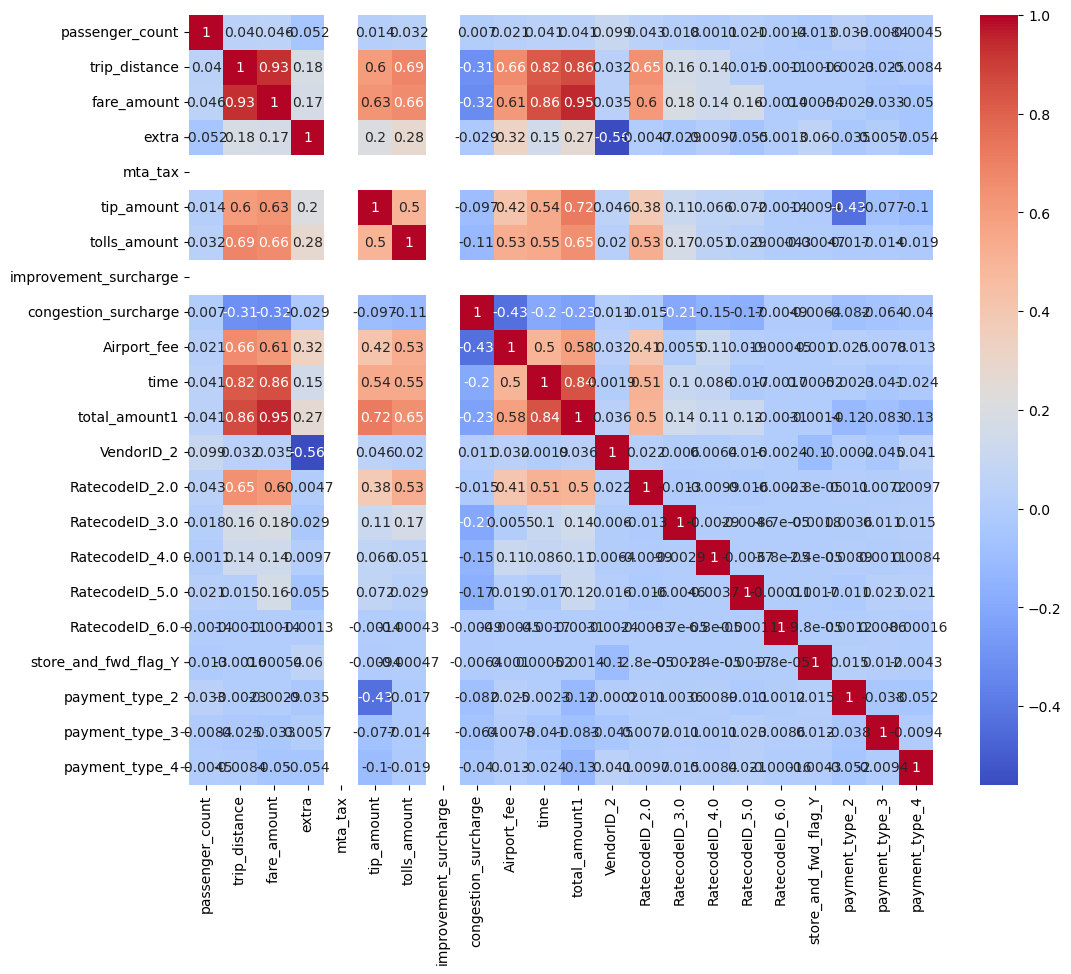

In [96]:
plt.figure(figsize=(12,10))
sns.heatmap(cr,annot=True,cmap='coolwarm')

In [97]:
df2.drop(columns=['fare_amount'],inplace=True)

In [98]:
cr2 = df2.corr()

<Axes: >

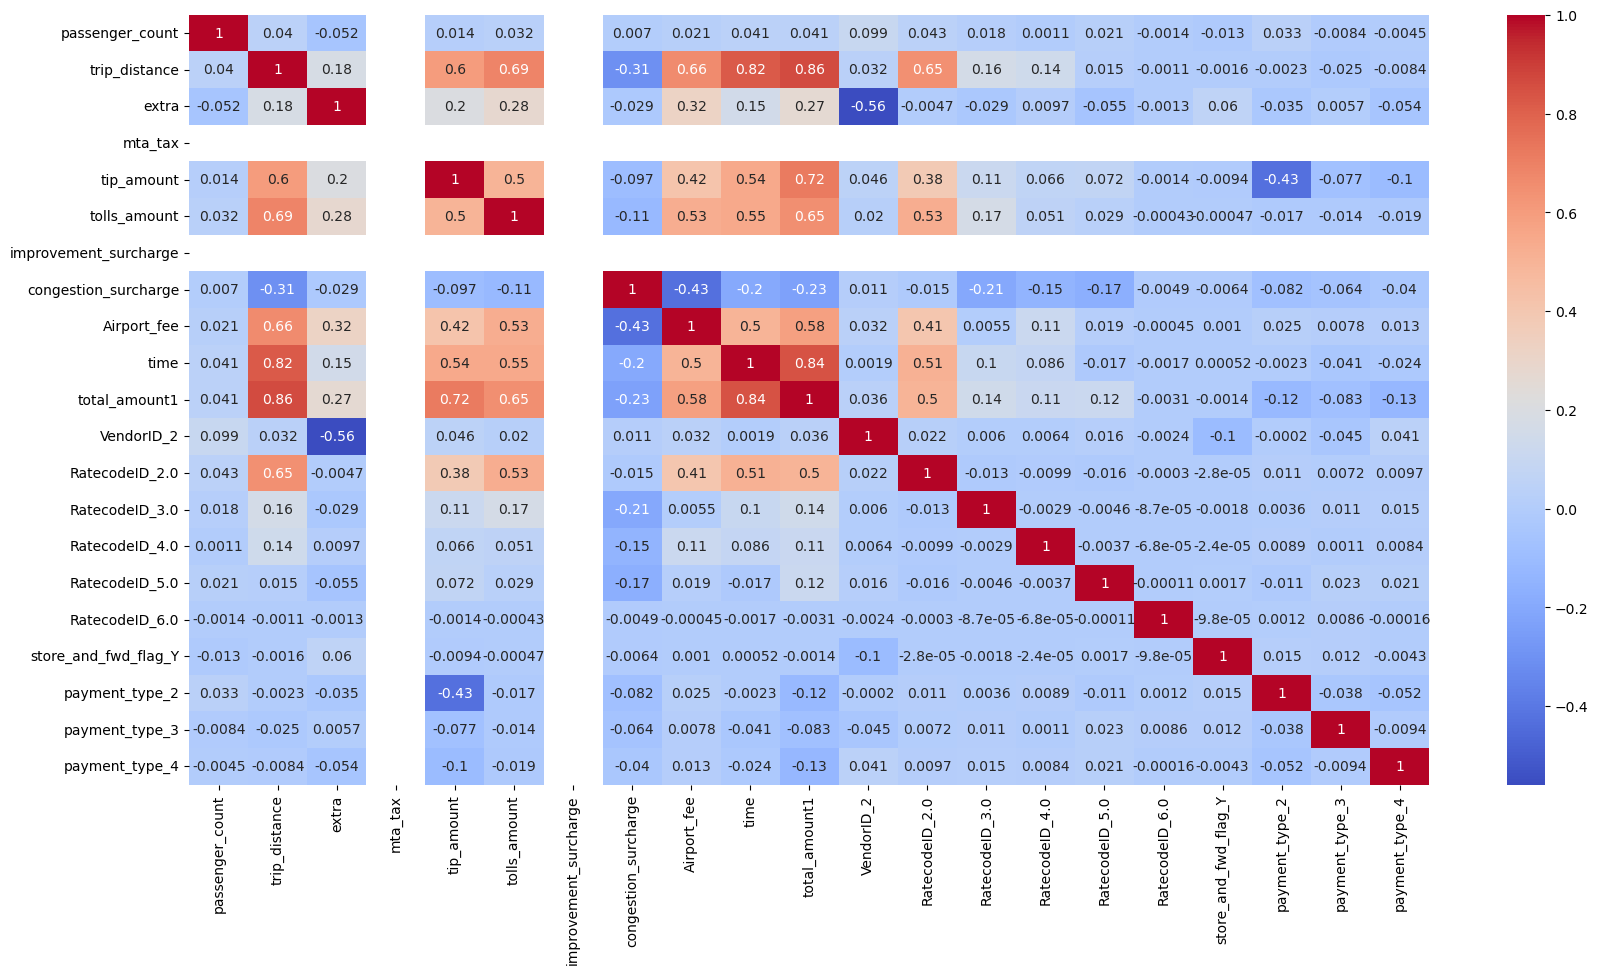

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(cr2,annot=True,cmap='coolwarm')

In [100]:
#df2.drop(columns=['trip_distance'],inplace=True)

In [101]:
#cr3 = df2.corr()

<Axes: >

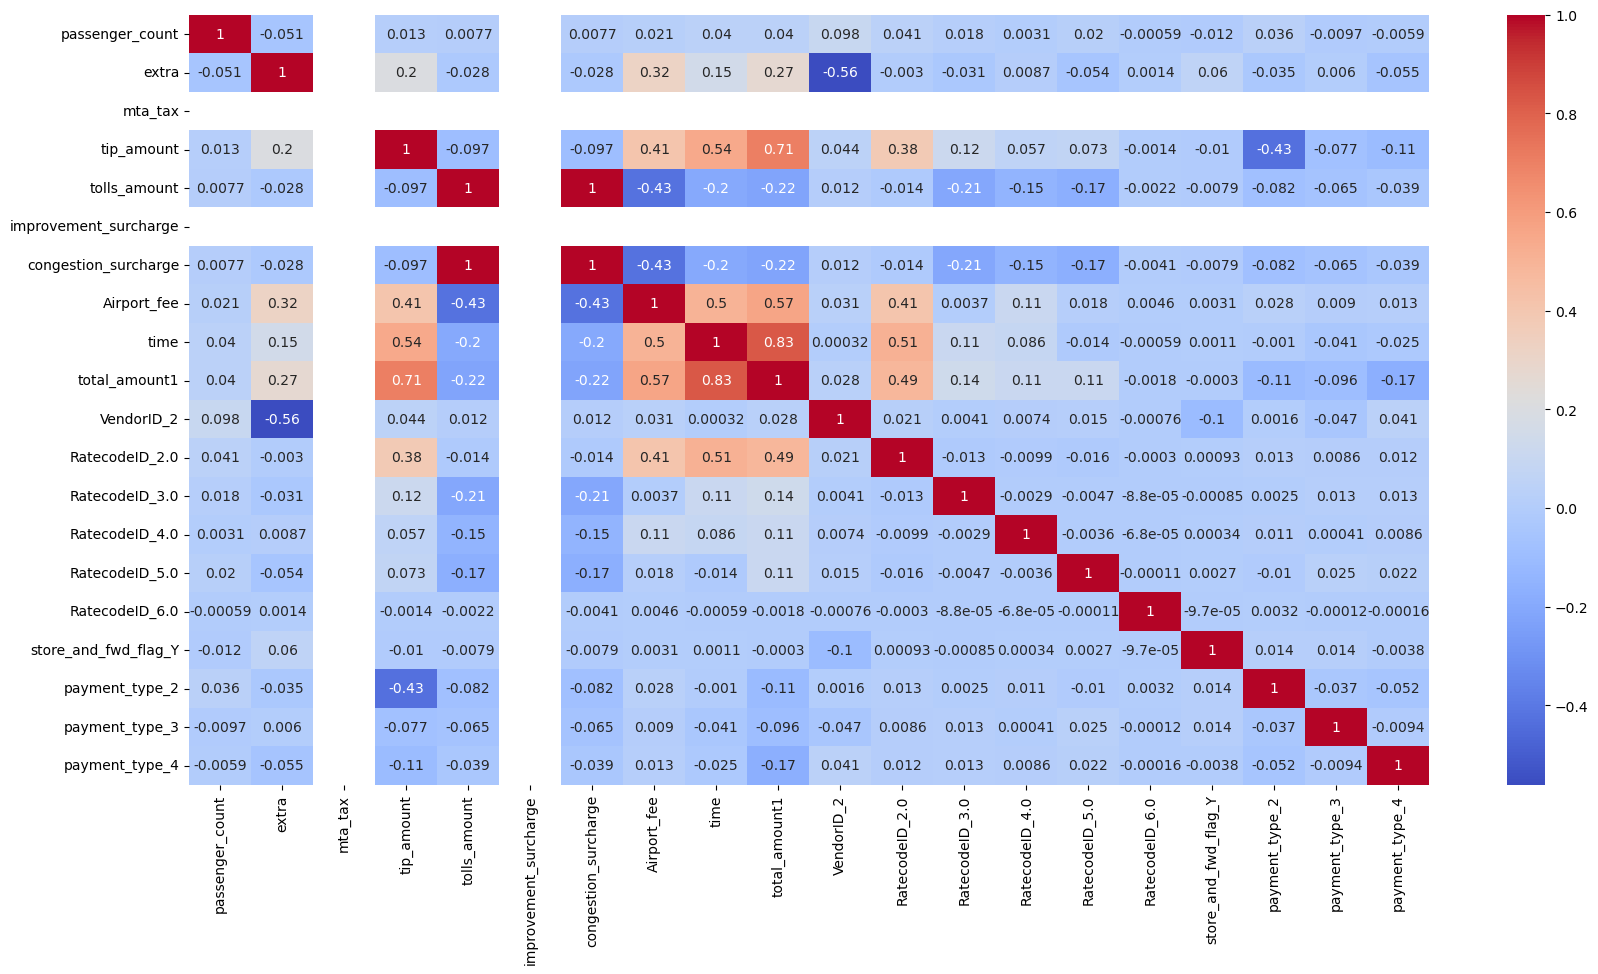

In [102]:
#plt.figure(figsize=(20,10))
#sns.heatmap(cr3,annot=True,cmap='coolwarm')

In [100]:
df2.drop(columns=['time'],inplace=True)

In [101]:
cr4 = df2.corr()

<Axes: >

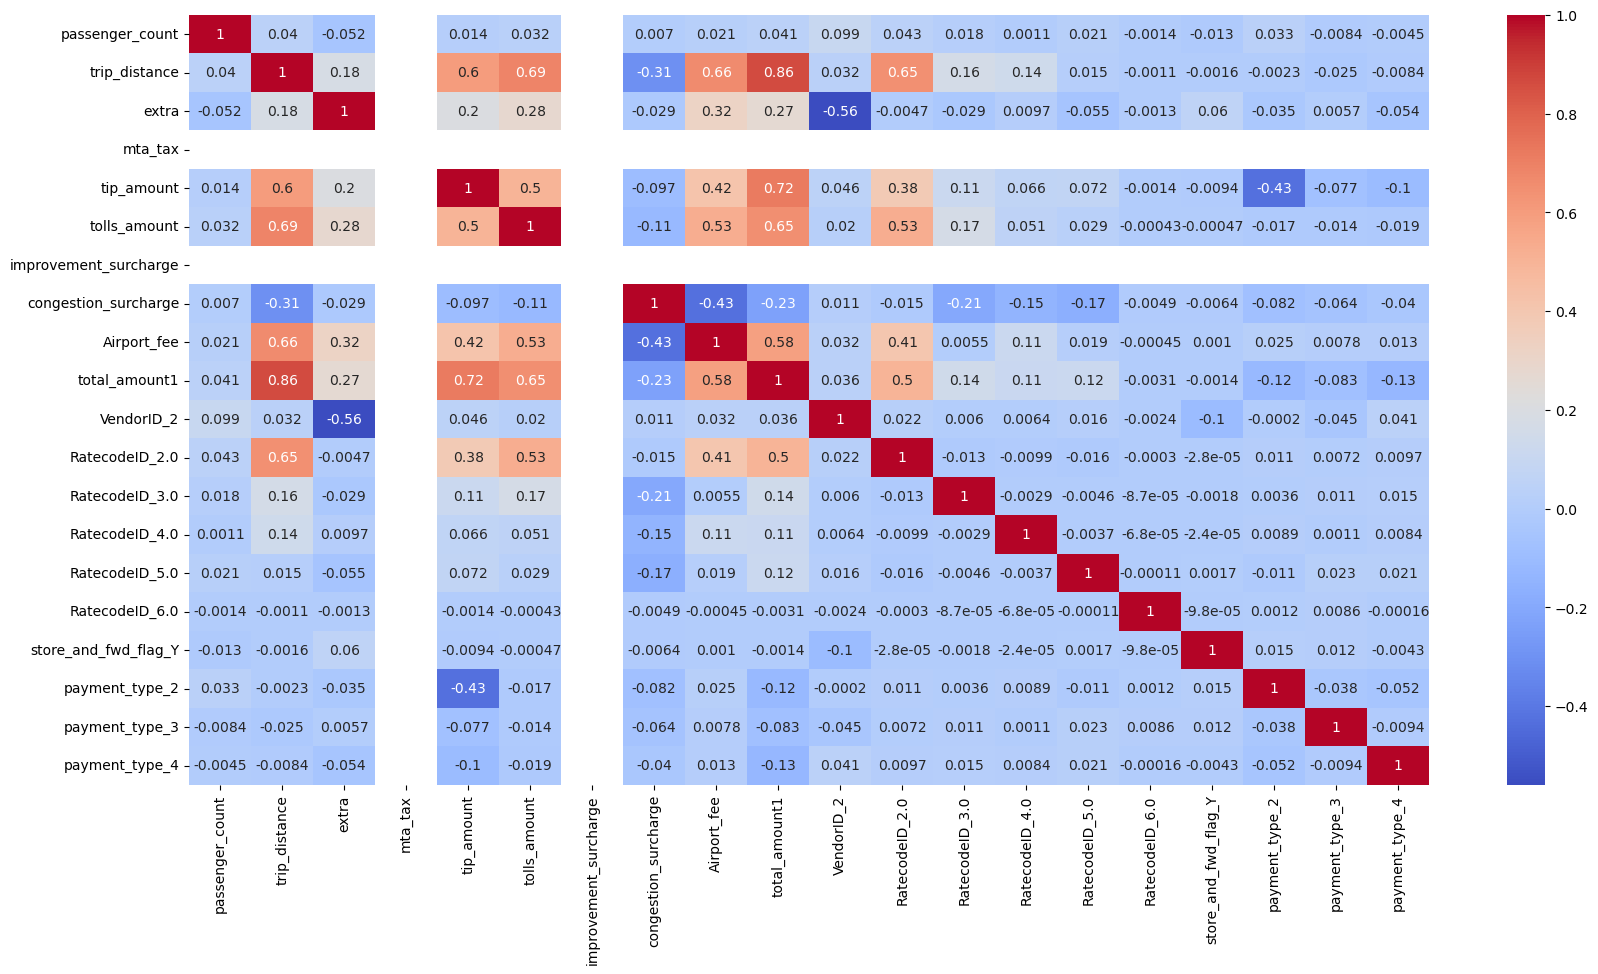

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(cr4,annot=True,cmap='coolwarm')

In [103]:
#df2.drop(columns=['tip_amount'],inplace=True)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
y = df2['total_amount1']
x = df2.drop(columns = ['total_amount1'])

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [107]:
lr=LinearRegression()

In [108]:
lr.fit(x_train,y_train)

LinearRegression()

In [109]:
lr.score(x_train,y_train)

0.8430080323530769

In [110]:
lr.score(x_test,y_test)

0.8406444265133711

In [111]:
import statsmodels.api as sm
x = sm.add_constant(x_train)

In [112]:
model = sm.OLS(y_train,x).fit()

In [113]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          total_amount1   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 2.145e+05
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:04:36   Log-Likelihood:             3.7480e+05
No. Observations:              678943   AIC:                        -7.496e+05
Df Residuals:                  678925   BIC:                        -7.493e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
passenger_count           0.00

In [114]:
from sklearn.metrics import mean_absolute_error

In [115]:
pred_train = lr.predict(x_train)

In [116]:
pred_train

array([2.05611121, 3.2322233 , 2.03310907, ..., 2.03244012, 2.14788404,
       2.23695177])

In [117]:
pred_test = lr.predict(x_test)

In [118]:
mae = mean_absolute_error(y_test,pred_test) 

In [119]:
mae

0.09494683231071457

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
mse = mean_squared_error(y_test,pred_test)

In [122]:
mse

0.019627456584457064

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
dtr = DecisionTreeRegressor()

In [125]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [126]:
dtr.score(x_train,y_train)

0.9734237581970594

In [127]:
dtr.score(x_test,y_test)

0.9334861068414304

In [128]:
dtr.feature_importances_

array([2.90060602e-03, 8.22708410e-01, 1.36417947e-02, 0.00000000e+00,
       1.09181718e-01, 9.51584304e-03, 0.00000000e+00, 2.94127966e-03,
       1.06759231e-03, 3.49264394e-03, 8.49750040e-03, 1.02958610e-03,
       2.86179008e-04, 6.02674877e-03, 9.22984353e-09, 2.57964119e-04,
       2.13888099e-03, 2.80006282e-03, 1.35131809e-02])

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_23824\2566874945.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-pred_train)


<Axes: xlabel='total_amount1', ylabel='Density'>

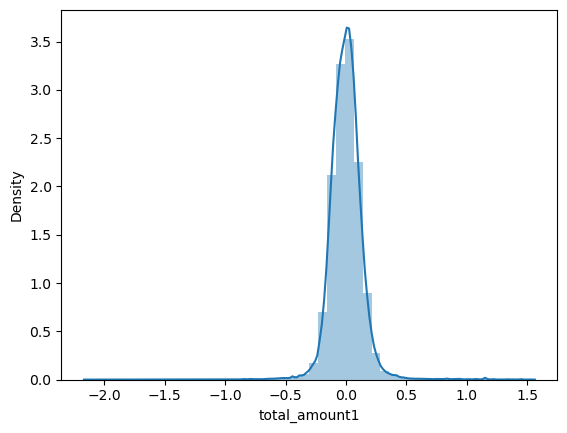

In [129]:
sns.distplot(y_train-pred_train)

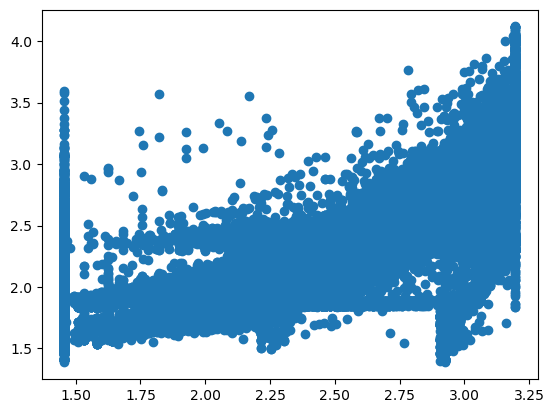

In [130]:
plt.scatter(y_train,pred_train)

In [131]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
params = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
         'max_depth':[5,7,9,10,11],
         'min_samples_leaf':[5,10,15,20,50,80,100],
         'min_samples_split':[10,15,20,50,100,250]}

dtc = DecisionTreeRegressor(random_state=0)
gdsearch = GridSearchCV(estimator=dtc,param_grid=params,cv=5,n_jobs=6)
gdsearch.fit(x_train,y_train)

840